In [1]:
#for loading images tensor matris formations
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
#from keras.applications.vgg16
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  
from sklearn import metrics 
from pylab import rcParams
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD  

import os
import cv2
import numpy as np
import pandas as pd 

In [ ]:
train_lfw_datagen = ImageDataGenerator(rescale=1./255,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)
train_lfw_data = train_lfw_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/lwf_archive/lfw_funneled/',
                                                        target_size = (110,110),
                                                        batch_size = 32,
                                                        class_mode='categorical'  
                                                      ) 

Found 13233 images belonging to 5749 classes.


In [ ]:
train_lfw_sample_data_gen = ImageDataGenerator(rescale=1./255,
                                               shear_range=0.2,
                                               zoom_range=0.2,
                                               horizontal_flip=True)
train_lfw_sample_data = train_lfw_sample_data_gen.flow_from_directory('/content/drive/MyDrive/Datasets/lwf_archive/lfw_sample/',
                                                                      target_size = (110, 110),
                                                                      batch_size = 32,
                                                                      class_mode='categorical')

Found 2728 images belonging to 6 classes.


In [ ]:
train_lfw_sample2_data_gen = ImageDataGenerator(rescale=1./255,
                                               shear_range=0.2,
                                               zoom_range=0.2,
                                               horizontal_flip=True)
train_lfw_sample2_data = train_lfw_sample2_data_gen.flow_from_directory('/content/drive/MyDrive/Datasets/lwf_archive/lfw_sample2/',
                                                                    target_size = (110, 110),
                                                                    batch_size = 32,
                                                                    class_mode = 'categorical')

Found 850 images belonging to 2 classes.


In [ ]:
model_sample3 = Sequential()
model_sample3.add(Conv2D(32, (3,3), input_shape=(110, 110, 3), activation="relu"))
model_sample3.add(MaxPooling2D(pool_size=(2,2)))
model_sample3.add(Flatten())
model_sample3.add(Dense(units=128, activation='relu'))
model_sample3.add(Dense(units=2, activation="softmax"))

In [ ]:
optimizer3 = SGD(learning_rate=0.01)
model_sample3.compile(optimizer=optimizer3, loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
model_sample3.fit(train_lfw_sample2_data, epochs=50) #train

Epoch 1/50
27/27 [==============================] - 164s 6s/step - loss: 0.6325 - accuracy: 0.6282
Epoch 2/50
27/27 [==============================] - 4s 161ms/step - loss: 0.5375 - accuracy: 0.7412
Epoch 3/50
27/27 [==============================] - 4s 160ms/step - loss: 0.4558 - accuracy: 0.7976
Epoch 4/50
27/27 [==============================] - 4s 160ms/step - loss: 0.4005 - accuracy: 0.8282
Epoch 5/50
27/27 [==============================] - 4s 159ms/step - loss: 0.3463 - accuracy: 0.8565
Epoch 6/50
27/27 [==============================] - 4s 159ms/step - loss: 0.3196 - accuracy: 0.8741
Epoch 7/50
27/27 [==============================] - 4s 158ms/step - loss: 0.3160 - accuracy: 0.8765
Epoch 8/50
27/27 [==============================] - 4s 157ms/step - loss: 0.2740 - accuracy: 0.9000
Epoch 9/50
27/27 [==============================] - 4s 159ms/step - loss: 0.2770 - accuracy: 0.8988
Epoch 10/50
27/27 [==============================] - 4s 158ms/step - loss: 0.2639 - accuracy: 0.8941


In [ ]:
model_sample_3 = Model(inputs = model_sample3.inputs, outputs = model_sample3.layers[-2].output)

In [ ]:
model_sample2 = Sequential()

model_sample2.add(Conv2D(32, (3,3), input_shape=(110, 110, 3), activation="relu"))
model_sample2.add(MaxPooling2D(pool_size=(2,2)))
model_sample2.add(Flatten())
model_sample2.add(Dense(units=128, activation='relu'))
model_sample2.add(Dense(units=6, activation="softmax"))

In [ ]:
model_sample2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               11944064  
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
Total params: 11,945,734
Trainable params: 11,945,734
Non-trainable params: 0
__________________________________________

In [ ]:
optimizer_2 = SGD(learning_rate=0.01)
model_sample2.compile(optimizer=optimizer_2, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model_sample2.fit(train_lfw_sample_data, epochs=30)

Epoch 1/30
86/86 [==============================] - 14s 157ms/step - loss: 0.9894 - accuracy: 0.6228
Epoch 2/30
86/86 [==============================] - 14s 157ms/step - loss: 0.9722 - accuracy: 0.6279
Epoch 3/30
86/86 [==============================] - 14s 159ms/step - loss: 0.9553 - accuracy: 0.6430
Epoch 4/30
86/86 [==============================] - 14s 158ms/step - loss: 0.9361 - accuracy: 0.6499
Epoch 5/30
86/86 [==============================] - 14s 158ms/step - loss: 0.9199 - accuracy: 0.6503
Epoch 6/30
86/86 [==============================] - 14s 160ms/step - loss: 0.8969 - accuracy: 0.6580
Epoch 7/30
86/86 [==============================] - 13s 155ms/step - loss: 0.8855 - accuracy: 0.6639
Epoch 8/30
86/86 [==============================] - 13s 156ms/step - loss: 0.8904 - accuracy: 0.6628
Epoch 9/30
86/86 [==============================] - 13s 156ms/step - loss: 0.8780 - accuracy: 0.6628
Epoch 10/30
86/86 [==============================] - 14s 157ms/step - loss: 0.8517 - accura

In [ ]:
model_add_2 = model_sample2.save("my_model_six") #save the model

INFO:tensorflow:Assets written to: my_model_six/assets


In [ ]:
model_sample2 = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/lwf_archive/my_model_six') #load the model

In [ ]:
from keras.models import Model
model_sample_2 = Model(inputs = model_sample2.inputs, outputs= model_sample2.layers[-2].output)

In [ ]:
model_lfw = Sequential()

model_lfw.add(Conv2D(32, (3,3), input_shape=(110, 110, 3), activation="relu")) #input_shape kaldırıldı 
model_lfw.add(MaxPooling2D(pool_size=(2,2)))
model_lfw.add(Flatten())
model_lfw.add(Dense(units=128, activation="relu"))
model_lfw.add(Dense(units=5749, activation="softmax"))

In [ ]:
model_lfw.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 128)               11944064  
                                                                 
 dense_1 (Dense)             (None, 5749)              741621    
                                                                 
Total params: 12,686,581
Trainable params: 12,686,581
Non-trainable params: 0
____________________________________________

In [ ]:
optimizer_1 = SGD(learning_rate=0.01)
model_lfw.compile(optimizer=optimizer_1, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model_lfw.fit(train_lfw_data, epochs=8)

Epoch 1/8
414/414 [==============================] - 10870s 26s/step - loss: 8.2321 - accuracy: 0.0388
Epoch 2/8
414/414 [==============================] - 88s 213ms/step - loss: 7.9004 - accuracy: 0.0379
Epoch 3/8
414/414 [==============================] - 67s 163ms/step - loss: 7.8112 - accuracy: 0.0391
Epoch 4/8
414/414 [==============================] - 67s 163ms/step - loss: 7.7333 - accuracy: 0.0420
Epoch 5/8
414/414 [==============================] - 68s 163ms/step - loss: 7.6458 - accuracy: 0.0446
Epoch 6/8
414/414 [==============================] - 67s 163ms/step - loss: 7.5436 - accuracy: 0.0497
Epoch 7/8
414/414 [==============================] - 67s 163ms/step - loss: 7.4352 - accuracy: 0.0528
Epoch 8/8
414/414 [==============================] - 67s 162ms/step - loss: 7.3270 - accuracy: 0.0571


In [ ]:
model_add = model_lfw.save("my_model") #save the model

INFO:tensorflow:Assets written to: my_model/assets


In [2]:
model_lfw =  tf.keras.models.load_model("/content/drive/MyDrive/Datasets/lwf_archive/my_model")

In [ ]:
path = r"/content/drive/MyDrive/Datasets/lwf_archive/lfw_funneled/"

os.chdir(path)

faces = []

with os.scandir(path) as files:
  for file in files:
    name = file.name
    if name.endswith('.txt'):
      continue
    path_2 = os.path.join(path, name)
    #print(path_2)
    os.chdir(path_2)
    with os.scandir(path_2) as files:
      for file2 in files:
        #print(file2.name)
        if file2.name.endswith('.jpg'):
          faces.append(file2) #add image files file2.name yerine kendisi
    
    #print(file.name)
    #break
    #if file.name.endswith('.jpg'):
      #faces.append(file.name)


In [ ]:
print(len(faces)) #lfw face numbers
print(faces[:10])
#faces.shape

13233
[<DirEntry 'Rod_Paige_0001.jpg'>, <DirEntry 'Rod_Thorn_0001.jpg'>, <DirEntry 'Rodrigo_de_la_Cerna_0001.jpg'>, <DirEntry 'Rod_Jong-il_0001.jpg'>, <DirEntry 'Rogelio_Montemayor_0001.jpg'>, <DirEntry 'Rogelio_Ramos_0001.jpg'>, <DirEntry 'Rogerio_Romero_0001.jpg'>, <DirEntry 'Rogerio_Romero_0002.jpg'>, <DirEntry 'Roger_Clemens_0001.jpg'>, <DirEntry 'Roger_Clemens_0002.jpg'>]


In [3]:
from keras.models import Model
model_try = Model(inputs = model_lfw.inputs, outputs = model_lfw.layers[-2].output) #model CNN

def CNN_face(file, model):
  img = load_img(file, target_size = (110, 110))

  img = np.array(img)

  reshaped_image = img.reshape(1, 110, 110, 3)

  imgx = preprocess_input(reshaped_image)

  features = model.predict(imgx, use_multiprocessing=True)

  return features


In [ ]:
data = {}
#p = "" optional

for face in faces: 
  feat = CNN_face(face, model_try)
  data[face] = feat


filenames = np.array(list(data.keys())) #get filenames

feat = np.array(list(data.values())) #get the features

feat = feat.reshape(-1, 128) #get the vectors 

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=22)

In [ ]:
groups = {}

for file, cluster in zip(filenames, kmeans.labels_):
  if cluster not in groups.keys():
    groups[cluster] = []
    groups[cluster].append(file)
  else:
    groups[cluster].append(file)

In [11]:
def view_the_cluster(cluster):
  plt.figure(figsize = (25, 25))
  files = groups[cluster]
  if len(files) > 30:
    print(f'Dosya sayısı su sayıdan {len(files)} to 30')
    files = files[:29]

  for index, file in enumerate(files):
    plt.subplot(10, 10, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')

In [ ]:
print(len(groups))
for group in range(len(groups)):
  view_the_cluster(group)

Output hidden; open in https://colab.research.google.com to view.

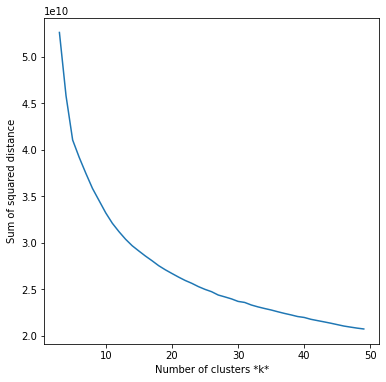

In [ ]:
#whick k number is the best
sse = []
list_k = list(range(3, 50))

for k in list_k:
  km = KMeans(n_clusters = k, random_state = 22)
  km.fit(x)

  sse.append(km.inertia_)


plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


In [ ]:
#find cluster scores of this model with no real labels
kmeans_score = KMeans(n_clusters = 5, random_state = 22).fit(x)
labels = kmeans_score.labels_
metrics.silhouette_score(x, labels, metric = "euclidean")

0.18145019

In [ ]:
kmeans_per_k = [KMeans(n_clusters = k, random_state = 22).fit(x) for k in range(3, 50)]

silhouette_score_array = [ metrics.silhouette_score(x, model.labels_, metric = "euclidean")
                            for model in kmeans_per_k[1:]]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


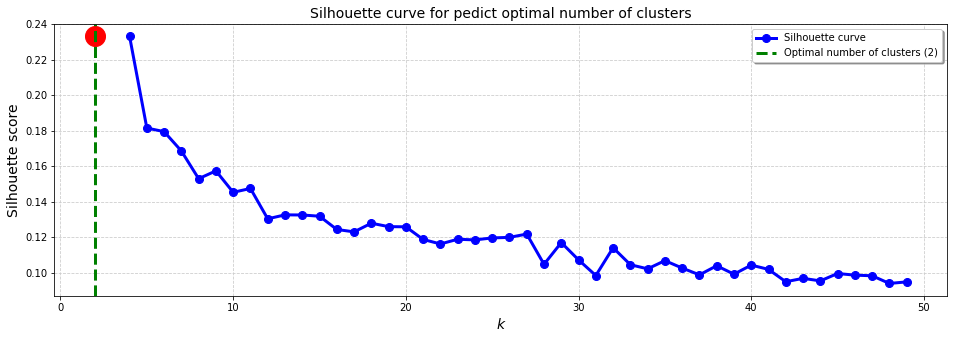

In [ ]:
rcParams['figure.figsize'] = 16, 5
_ = plt.plot(range(4, 50), silhouette_score_array, "bo-", color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette curve')
_ = plt.xlabel("$k$", fontsize = 14, family = "Arial")
_ = plt.ylabel("Silhouette score", fontsize = 14, family = "Arial")
_ = plt.grid(which = "major", color = "#cccccc", linestyle = "--")
_ = plt.title("Silhouette curve for pedict optimal number of clusters", family = "Arial", fontsize = 14)

k = np.argmax(silhouette_score_array) + 2

_ = plt.axvline(x = k, linestyle = "--", c = "green", linewidth = 3, label = "Optimal number of clusters ({})".format(k))
_ = plt.scatter(k, silhouette_score_array[k - 2], c = "red", s = 400)
_ = plt.legend(shadow = True)
_ = plt.show()

In [ ]:
print("The optimal number of cluster for LFW {}.".format(k))

The optimal number of cluster for LFW 2.


In [ ]:
#davies bouldin score 
kmeans_score = KMeans(n_clusters = 5, random_state = 22).fit(x)
labels = kmeans_score.labels_
metrics.davies_bouldin_score(x, labels)  

1.49110869912183

In [ ]:
#calinski-harabasz Index
kmeans_score = KMeans(n_clusters = 5, random_state = 22).fit(x)
labels = kmeans_score.labels_
metrics.calinski_harabasz_score(x, labels)

2727.631913338096

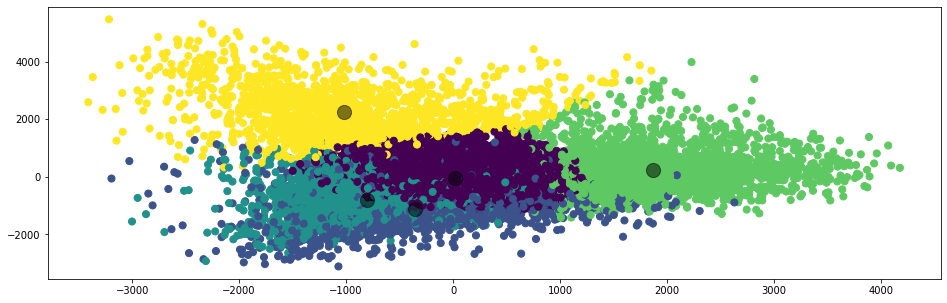

In [ ]:
#visualize clusters 
kmeans_visual = KMeans(n_clusters = 5, random_state = 22).fit(x)
y_kmeans = kmeans_visual.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s = 50, cmap = "viridis")

centers = kmeans_visual.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "black", s = 200, alpha = 0.5)

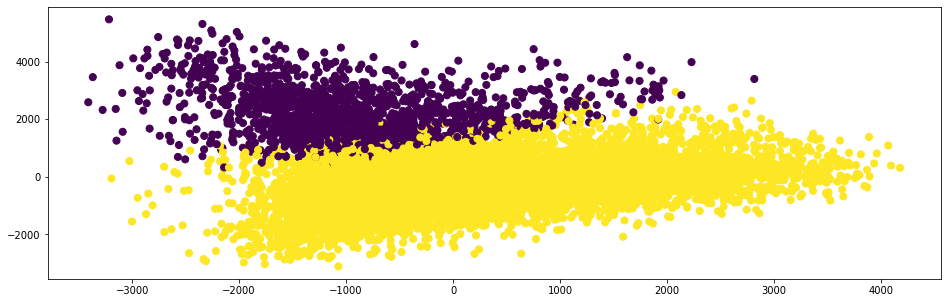

In [ ]:
model_spec = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
labels = model_spec.fit_predict(x)
plt.scatter(x[:,0], x[:, 1], c=labels, s=50, cmap="viridis")

In [ ]:
#extract t-Sine model
k = 5
km = KMeans(n_clusters = k, init = "k-means++", max_iter = 100, n_init = 5, verbose = 1)
km.fit(x)

Initialization complete
Iteration 0, inertia 66423959552.0
Iteration 1, inertia 46356533248.0
Iteration 2, inertia 42674868224.0
Iteration 3, inertia 41470808064.0
Iteration 4, inertia 41162670080.0
Iteration 5, inertia 41065775104.0
Iteration 6, inertia 41036091392.0
Iteration 7, inertia 41027788800.0
Iteration 8, inertia 41024212992.0
Iteration 9, inertia 41022787584.0
Iteration 10, inertia 41022283776.0
Iteration 11, inertia 41022078976.0
Iteration 12, inertia 41022021632.0
Converged at iteration 12: center shift 2.8756051063537598 within tolerance 5.6568246093750005.
Initialization complete
Iteration 0, inertia 81913462784.0
Iteration 1, inertia 42989834240.0
Iteration 2, inertia 41504440320.0
Iteration 3, inertia 41180872704.0
Iteration 4, inertia 41070133248.0
Iteration 5, inertia 41036324864.0
Iteration 6, inertia 41026711552.0
Iteration 7, inertia 41023946752.0
Iteration 8, inertia 41022636032.0
Iteration 9, inertia 41022189568.0
Iteration 10, inertia 41022160896.0
Iteration 11

KMeans(max_iter=100, n_clusters=5, n_init=5, verbose=1)

In [ ]:
tfs_reduced = TruncatedSVD(n_components = k, random_state = 0).fit_transform(x) #t-sine transformation
tfs_embedded = TSNE(n_components = 2, perplexity = 40, verbose = 2).fit_transform(tfs_reduced) #fit t-sine transformation

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13233 samples in 0.036s...
[t-SNE] Computed neighbors for 13233 samples in 0.965s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13233
[t-SNE] Computed conditional probabilities for sample 2000 / 13233
[t-SNE] Computed conditional probabilities for sample 3000 / 13233
[t-SNE] Computed conditional probabilities for sample 4000 / 13233
[t-SNE] Computed conditional probabilities for sample 5000 / 13233
[t-SNE] Computed conditional probabilities for sample 6000 / 13233
[t-SNE] Computed conditional probabilities for sample 7000 / 13233
[t-SNE] Computed conditional probabilities for sample 8000 / 13233
[t-SNE] Computed conditional probabilities for sample 9000 / 13233
[t-SNE] Computed conditional probabilities for sample 10000 / 13233
[t-SNE] Computed conditional probabilities for sample 11000 / 13233
[t-SNE] Computed conditional probabilities for sample 12000 / 13233
[t-SNE] Computed conditional probabilities for sa

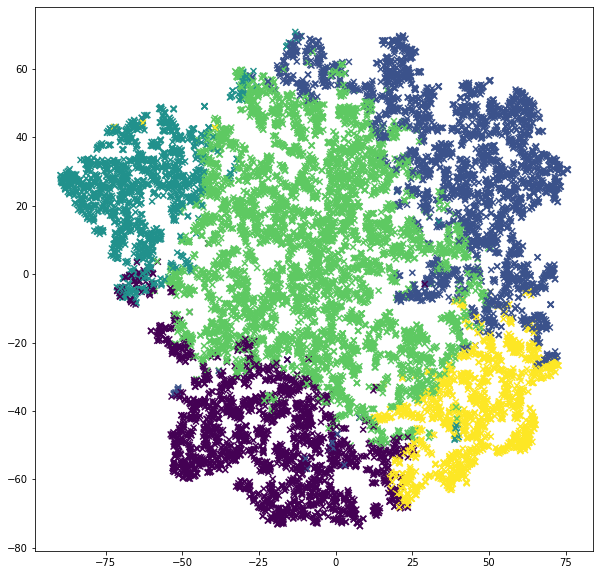

In [ ]:
#t-sine SNE application
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = km.labels_)
plt.show()

In [ ]:
#import lwf data set for evaluation 
from sklearn.datasets import fetch_lfw_people 
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=3)
X = lfw_people.images
print(X.shape)
print(X.dtype)
print(len(X))
print(X[0].shape)

(1288, 50, 37, 3)
float32
1288
(50, 37, 3)


In [ ]:
#print(lfw_people.data.shape[])
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
y = lfw_people.target
print(y.shape)

(1288,)


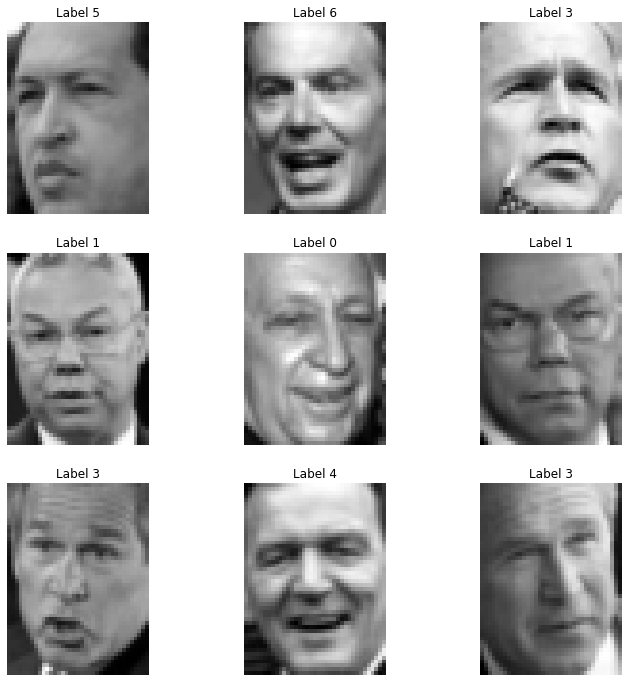

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
#plt.gray()

for i, ax in enumerate(axs.flat):
  ax.imshow(X[i])
  ax.axis('off')
  ax.set_title('Label {}'.format(y[i]))

plt.show()

In [ ]:
import cv2

In [ ]:

#model_try_2 = Model(inputs = model_lfw.inputs, outputs=model_lfw.layers[-2].output)
#def CNN_face_2(file, model):
  #img_array = cv2.cvtColor(file ,cv2.COLOR_BGR2RGB)
  #new_array = cv2.resize(img_array, (50, 37))
  #reshaped_image =  new_array.reshape(1, 50, 37, 3)
  #img = np.array(file)
  #reshaped_image = file.reshape(-1, 50, 37, 3)
  #imgx = preprocess_input(reshaped_image)
  #features = model.predict(imgx, use_multiprocessing=True)

  #return features 

In [ ]:
#make pca 
#data_2 = {}

#for face in range(len(X)):
  #feat = CNN_face_2(X[face], model_try_2)
  #data_2[face] = feat 

#filenames = np.array(list(data.keys()))
#feat = np.array(list(data.values()))
#feat = feat.reshape(-1, 128)

In [ ]:
#file labelling
path = r"/content/drive/MyDrive/Datasets/lwf_archive/lfw_funneled/"
num = -1 
para = 0
os.chdir(path)

faces_2 = []
y = []

with os.scandir(path) as files:
  for file in files:
    num += 1
    para += 1
    name = file.name
    if name.endswith('.txt'):
      num -=1 
      continue
    if para == 1000:
      break
    path_2 = os.path.join(path, name)
    os.chdir(path_2)
    with os.scandir(path_2) as files:
      for file2 in files:
        if file2.name.endswith('.jpg'):
          faces_2.append(file2)
          y.append(num) 


<class 'posix.DirEntry'>
2293
[<DirEntry 'Rod_Paige_0001.jpg'>, <DirEntry 'Rod_Thorn_0001.jpg'>, <DirEntry 'Rodrigo_de_la_Cerna_0001.jpg'>, <DirEntry 'Rod_Jong-il_0001.jpg'>, <DirEntry 'Rogelio_Montemayor_0001.jpg'>, <DirEntry 'Rogelio_Ramos_0001.jpg'>, <DirEntry 'Rogerio_Romero_0001.jpg'>, <DirEntry 'Rogerio_Romero_0002.jpg'>, <DirEntry 'Roger_Clemens_0001.jpg'>, <DirEntry 'Roger_Clemens_0002.jpg'>]


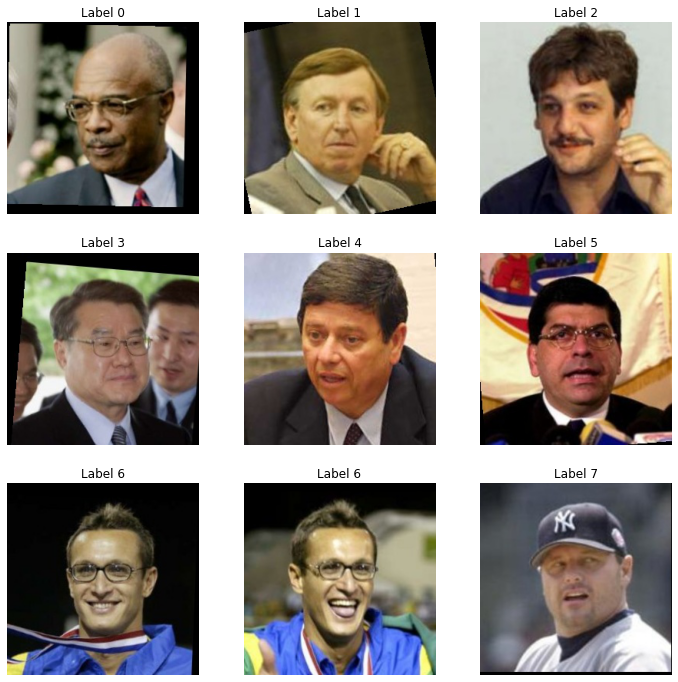

In [ ]:
print(type(faces_2[0]))
print(len(faces_2))
print(faces_2[:10])
fig, axs = plt.subplots(3, 3, figsize = (12, 12))

for i, ax in enumerate(axs.flat):
  img = load_img(faces_2[i])
  img = np.array(img)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title('Label {}'.format(y[i]))

In [ ]:
#CNN face
data_2 = {}

for face in faces_2:
  feat = CNN_face(face, model_try)
  data_2[face] = feat

filenames = np.array(list(data_2.keys())) #get files
feat = np.array(list(data_2.values())) #get the features
feat = feat.reshape(-1, 128) #get vectors 

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca_2 = pca.fit(feat)
x = pca_2.transform(feat)

In [ ]:
#find the features of the data_2
imgf = load_img(faces_2[0])
imgf = np.array(imgf)
print(imgf.shape)

(250, 250, 3)


In [ ]:
#create data
#X_data = np.ndarray([100, 128])
#print(X_data.shape)

In [ ]:
#create XMean
#XMean = np.mean(X_data, axis=0).reshape(1, 128) 

In [ ]:
#create eigenfaces
#eigenfaces = pca_2.components_
#print(eigenfaces.shape)
#images = np.concatenate((XMean, eigenfaces[:9]), axis=0)
#print(images.shape)

In [ ]:
#fig, axs = plt.subplots(3, 3, figsize=(12, 12))

#for i, ax in enumerate(axs.flat):
  #ax.imshow(images[i])
  #ax.axis('off') 
  #ax.set_title('Label {}'.format(y[i]))

In [ ]:
#kmeans
kmeans = KMeans(n_clusters=2293, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=2293, random_state=22)

In [ ]:
#define the functions
def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels = {}

  for i in range(kmeans.n_clusters):
    labels = []
    index = np.where(kmeans.labels_ == i)

    labels.append(actual_labels[index])

    if len(labels[0]) == 1:
      counts = np.bincount(labels[0])
    else:
      counts = np.bincount(np.squeeze(labels))

    if np.argmax(counts) in inferred_labels:
      inferred_labels[np.argmax(counts)].append(i)
    else:
      inferred_labels[np.argmax(counts)] = [i]


  return inferred_labels

In [ ]:
def infer_data_labels(X_labels, cluster_labels):
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
    for key, value in cluster_labels.items():
      if cluster in value:
        predicted_labels[i] = key

  return predicted_labels

In [ ]:
y_array = np.array(y)
cluster_labels = infer_cluster_labels(kmeans, y_array)
print(y_array.shape)

(2293,)


In [ ]:
X_clusters = kmeans.predict(x) #predict the labels
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y_array[:20])
print(predicted_labels.shape)

[ 0  1  2  3  4  5  6  6  7  7  8  9 10 11 12 13 13 13 13 13]
[ 0  1  2  3  4  5  6  6  7  7  8  9 10 11 12 13 13 13 13 13]
(2293,)


In [ ]:
from sklearn.metrics import homogeneity_score

def calc_metrics(estimator, labels):
  print('Number of clusters: {}'.format(estimator.n_clusters))

  inertia = estimator.inertia_
  print('Inertia: {}'.format(inertia))

  homogenity = homogeneity_score(labels, estimator.labels_)
  print('Homogenity score: {}'.format(homogenity))

In [ ]:
from sklearn.metrics import accuracy_score
calc_metrics(kmeans, y_array)
acc = accuracy_score(y_array, predicted_labels)

Number of clusters: 2293
Inertia: 0.0
Homogenity score: 0.9999999999999997


In [ ]:
print('Accuracy: {}\n'.format(acc))

Accuracy: 0.25817706061927603



In [ ]:
path = r'/content/drive/MyDrive/Datasets/lwf_archive/lfw_sample/'

faces_3 = []
y_train = []
num = -1
os.chdir(path)


with os.scandir(path) as files:
  for file in files:
    num += 1
    name = file.name
    if name.endswith('.txt'):
      num -= 1
      continue
    path_2 = os.path.join(path, name)
    os.chdir(path_2)
    with os.scandir(path_2) as files:
      for file2 in files:
        if file2.name.endswith('.jpg'):
          faces_3.append(file2) 
          y_train.append(num)

<class 'posix.DirEntry'>
2728
[<DirEntry 'George_W_Bush_0051.jpg'>, <DirEntry 'George_W_Bush_0027.jpg'>, <DirEntry 'George_W_Bush_0046.jpg'>, <DirEntry 'George_W_Bush_0039.jpg'>, <DirEntry 'George_W_Bush_0009.jpg'>, <DirEntry 'George_W_Bush_0011.jpg'>, <DirEntry 'George_W_Bush_0052.jpg'>, <DirEntry 'George_W_Bush_0008.jpg'>, <DirEntry 'George_W_Bush_0012.jpg'>, <DirEntry 'George_W_Bush_0004.jpg'>]


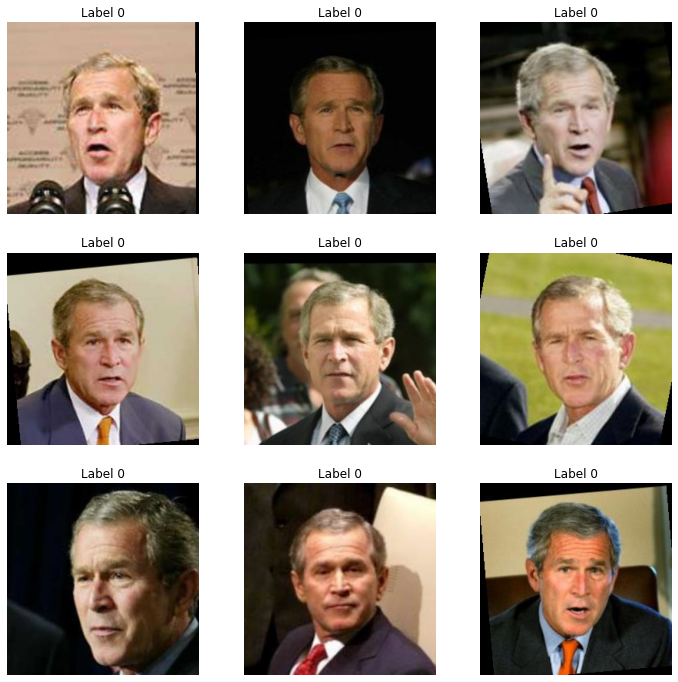

In [ ]:
print(type(faces_3[0]))
print(len(faces_3))
print(faces_3[:10])

fig, axs = plt.subplots(3,3, figsize = (12, 12))

for i, ax in enumerate(axs.flat):
  img = load_img(faces_3[i])
  img = np.array(img)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title('Label {}'.format(y_train[i]))


In [ ]:
print(len(y_train))

2728


In [ ]:
data_3 = {}

for face in faces_3:
  feat = CNN_face(face, model_try)
  data_3[face] = feat

filenames = np.array(list(data_3.keys())) #get the keys
feat = np.array(list(data_3.values()))
feat = feat.reshape(-1, 128)

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca_3 = pca.fit(feat)
x = pca_3.transform(feat)

In [ ]:
#kmeans
kmeans = KMeans(n_clusters=6, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=6, random_state=22)

In [ ]:
y_train = np.array(y_train)
print(y_train.shape)
cluster_labels = infer_cluster_labels(kmeans, y_train)

(2728,)


In [ ]:
X_clusters = kmeans.predict(x)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y_train[:20])

[0 1 5 0 1 1 5 0 0 0 1 5 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
calc_metrics(kmeans, y_train)
acc = accuracy_score(y_train, predicted_labels)
print('Accuracy: {}\n'.format(acc)) #accuracy rate 

Number of clusters: 6
Inertia: 8076744704.0
Homogenity score: 0.03784687548443478
Accuracy: 0.2375366568914956



In [4]:
#2 group version 
path = r"/content/drive/MyDrive/Datasets/lwf_archive/lfw_sample2/"
num = -1

os.chdir(path)
faces_3 = []
y_train = []

with os.scandir(path) as files:
  for file in files:
    num += 1
    name = file.name
    if name.endswith('.txt'):
      num -= 1
      continue
    path_2 = os.path.join(path, name)
    os.chdir(path_2)
    with os.scandir(path_2) as files:
      for file2 in files:
        if file2.name.endswith('.jpg'):
          faces_3.append(file2)
          y_train.append(num)

<class 'posix.DirEntry'>
850
[<DirEntry 'Adriana_Perez_Navarro_0001.jpg'>, <DirEntry 'Agnes_Bruckner_0001.jpg'>, <DirEntry 'Adrianna_Zuzic_0001.jpg'>, <DirEntry 'Afton_Smith_0001.jpg'>, <DirEntry 'Adriana_Lima_0001.jpg'>, <DirEntry 'Alanis_Morissette_0001.jpg'>, <DirEntry 'Aileen_Riggin_Soule_0001.jpg'>, <DirEntry 'Aishwarya_Rai_0001.jpg'>, <DirEntry 'Aiysha_Smith_0001.jpg'>, <DirEntry 'Alberta_Lee_0001.jpg'>]


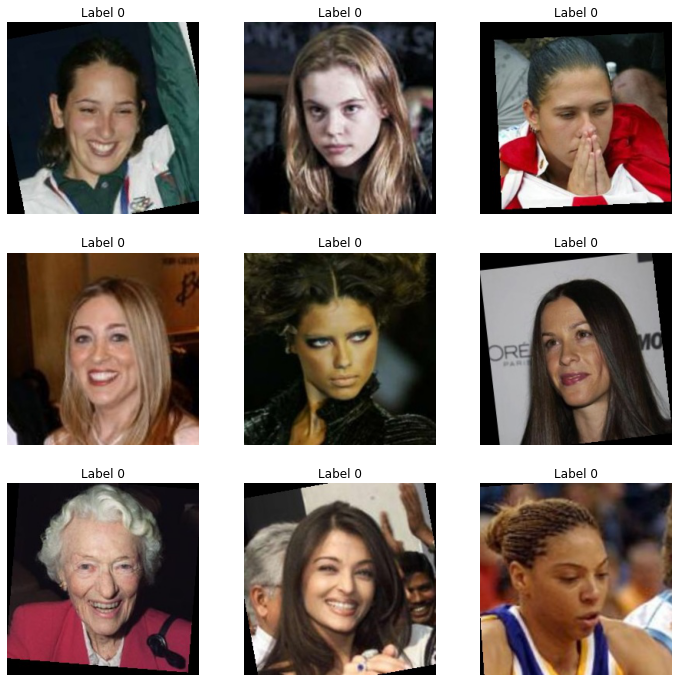

In [5]:
print(type(faces_3[0]))
print(len(faces_3))
print(faces_3[:10])

fig, axs = plt.subplots(3, 3, figsize = (12, 12))
for i, ax in enumerate(axs.flat):
  img = load_img(faces_3[i])
  img = np.array(img)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title('Label {}'.format(y_train[i]))

In [6]:
data_4 = {}

for face in faces_3:
  feat = CNN_face(face, model_try)
  data_4[face] = feat

filenames = np.array(list(data_4.keys()))
feat = np.array(list(data_4.values()))
feat = feat.reshape(-1, 128)

In [7]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat) 
x = pca.transform(feat)

In [8]:
kmeans = KMeans(n_clusters=2, random_state=22) 
kmeans.fit(x)

KMeans(n_clusters=2, random_state=22)

In [9]:
groups = {}
for file, cluster in zip(filenames, kmeans.labels_):
  if cluster not in groups.keys():
    groups[cluster] = []
    groups[cluster].append(file)
  else:
    groups[cluster].append(file) 

2
Dosya sayısı su sayıdan 188 to 30
Dosya sayısı su sayıdan 662 to 30


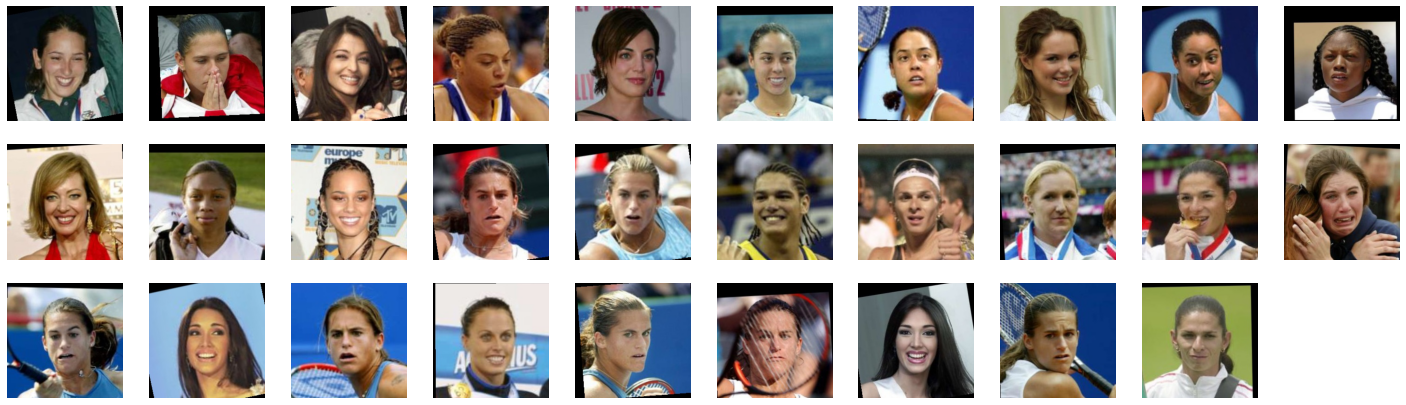

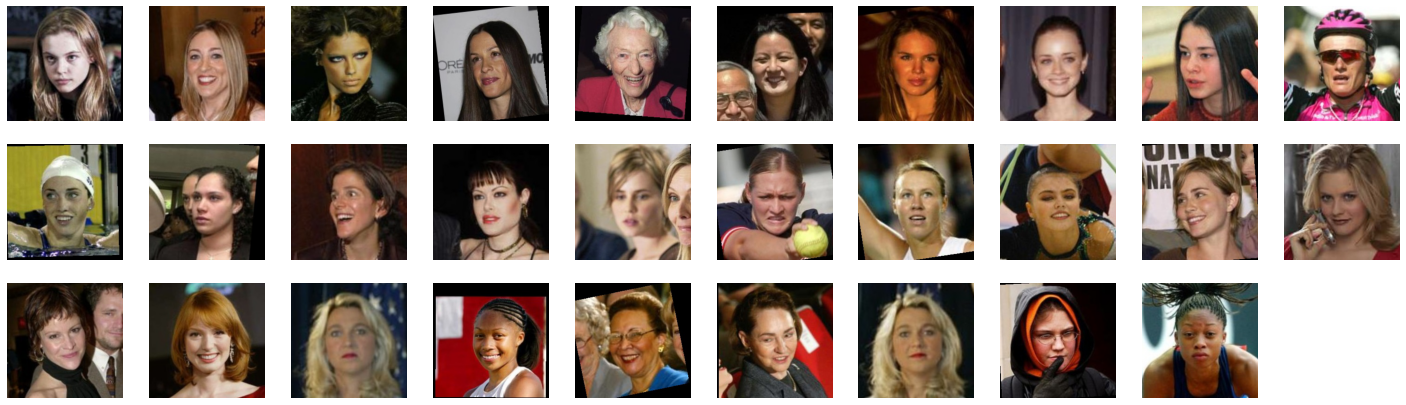

In [12]:
print(len(groups))
for group in range(len(groups)):
  view_the_cluster(group)

In [ ]:
y_array = np.array(y_train)
cluster_labels = infer_cluster_labels(kmeans, y_array)
print(y_array.shape)

(850,)


In [ ]:
X_clusters = kmeans.predict(x)
predicted_labels = infer_data_labels(kmeans.labels_, cluster_labels) #x clusters cluster labels
print(predicted_labels[:20])
print(y_array[:20])
print(predicted_labels.shape)

[0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(850,)


In [ ]:
from sklearn.metrics import accuracy_score 
calc_metrics(kmeans, y_train)
acc = accuracy_score(y_train, predicted_labels)
print('Accuracy: {}\n'.format(acc))

Number of clusters: 2
Inertia: 4168579840.0
Homogenity score: 0.049263766944196846
Accuracy: 0.6235294117647059



In [ ]:
#model sample 6 
path = r"/content/drive/MyDrive/Datasets/lwf_archive/lfw_sample/"
num = -1

os.chdir(path)
faces_4 = []
y_train_4 = []

with os.scandir(path) as files:
  for file in files:
    num += 1
    name = file.name
    if name.endswith('.txt'):
      num -= 1
      continue
    path_2 = os.path.join(path, name)
    os.chdir(path_2)
    with os.scandir(path_2) as files:
      for file2 in files:
        if file2.name.endswith('.jpg'):
          faces_4.append(file2)
          y_train_4.append(num)

In [ ]:
print(len(y_train_4))
print(y_train_4)

2728
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
data_5 = {}

for face in faces_4:
  feat = CNN_face(face, model_sample_2)
  data_5[face] = feat

filenames = np.array(list(data_5.keys()))
feat = np.array(list(data_5.values()))
feat = feat.reshape(-1, 128)

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=22) 
kmeans.fit(x)

KMeans(n_clusters=6, random_state=22)

In [ ]:
groups = {}
for file, cluster in zip(filenames, kmeans.labels_):
  if cluster not in groups.keys():
    groups[cluster] = []
    groups[cluster].append(file)
  else:
    groups[cluster].append(file)


In [ ]:
print(len(groups))
for go in range(len(groups)):
  view_the_cluster(go)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y_array_2 = np.array(y_train_4)
cluster_labels = infer_cluster_labels(kmeans, y_array_2)
print(y_array_2.shape)

(2728,)


In [ ]:
X_clusters = kmeans.predict(x)
predicted_labels = infer_data_labels(kmeans.labels_, cluster_labels)
print(predicted_labels[:20])
print(y_array_2[:20])
print(predicted_labels.shape)

[0 2 2 4 2 0 2 0 0 0 4 4 0 2 4 0 3 4 4 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(2728,)


In [ ]:
from sklearn.metrics import accuracy_score
calc_metrics(kmeans, y_train_4)
acc = accuracy_score(y_train_4, predicted_labels)
print('Accuracy: {}\n'.format(acc))

Number of clusters: 6
Inertia: 4473480192.0
Homogenity score: 0.036258061246866674
Accuracy: 0.26063049853372433



In [ ]:
#model sample 2
path = r"/content/drive/MyDrive/Datasets/lwf_archive/lfw_sample2/"
num = -1
faces_6 = []
y_train_6 = []

with os.scandir(path) as files:
  for file in files:
    num += 1
    name = file.name
    if name.endswith('.txt'):
      num -= 1
      continue
    path_2 = os.path.join(path, name)
    os.chdir(path_2)
    with os.scandir(path_2) as files:
      for file2 in files:
        if file2.name.endswith('.jpg'):
          faces_6.append(file2)
          y_train_6.append(num)

In [ ]:
print(len(faces_6))
print(faces_6)
print(len(y_train_6))

850
[<DirEntry 'Adriana_Perez_Navarro_0001.jpg'>, <DirEntry 'Agnes_Bruckner_0001.jpg'>, <DirEntry 'Adrianna_Zuzic_0001.jpg'>, <DirEntry 'Afton_Smith_0001.jpg'>, <DirEntry 'Adriana_Lima_0001.jpg'>, <DirEntry 'Alanis_Morissette_0001.jpg'>, <DirEntry 'Aileen_Riggin_Soule_0001.jpg'>, <DirEntry 'Aishwarya_Rai_0001.jpg'>, <DirEntry 'Aiysha_Smith_0001.jpg'>, <DirEntry 'Alberta_Lee_0001.jpg'>, <DirEntry 'Alanna_Ubach_0001.jpg'>, <DirEntry 'Alexandra_Stevenson_0003.jpg'>, <DirEntry 'Alexandra_Stevenson_0002.jpg'>, <DirEntry 'Alexandra_Vodjanikova_0001.jpg'>, <DirEntry 'Alexis_Bledel_0001.jpg'>, <DirEntry 'Alexandra_Rozovskaya_0001.jpg'>, <DirEntry 'Alexandre_Vinokourov_0001.jpg'>, <DirEntry 'Alexandra_Vodjanikova_0002.jpg'>, <DirEntry 'Alexandra_Stevenson_0001.jpg'>, <DirEntry 'Alexandra_Spann_0001.jpg'>, <DirEntry 'Alexandra_Jackson_0001.jpg'>, <DirEntry 'Alexandra_Pelosi_0001.jpg'>, <DirEntry 'Alexa_Loren_0001.jpg'>, <DirEntry 'Alison_Lohman_0002.jpg'>, <DirEntry 'Alicia_Hollowell_0001.jpg'>,

In [ ]:
data_6 = {}

for face in faces_6:
  feat = CNN_face(face, model_sample_3)
  data_6[face] = feat

filenames = np.array(list(data_6))
feat = np.array(list(data_6.values()))
feat = feat.reshape(-1, 128)

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=22)

In [ ]:
y_array_6 = np.array(y_train_6)
cluster_labels = infer_cluster_labels(kmeans, y_array_6)
print(y_array_6.shape)

(850,)


In [ ]:
X_clusters = kmeans.predict(x)
predicted_labels = infer_data_labels(kmeans.labels_, cluster_labels) #labels
print(predicted_labels[:20])
print(y_array_6[:20])

[0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score 
calc_metrics(kmeans, y_train_6)
acc = accuracy_score(y_train_6, predicted_labels)
print('Accuracy: {}\n'.format(acc))

Number of clusters: 2
Inertia: 78174016.0
Homogenity score: 0.020454804048579897
Accuracy: 0.5882352941176471

